In [2]:
%matplotlib inline
from spectral_cube import SpectralCube
from spectral_cube.dask_spectral_cube import DaskSpectralCube
import matplotlib.pyplot as plt
from pylab import imshow
from astropy import units as u
import numpy as np
from astroquery.splatalogue import Splatalogue
import warnings
warnings.simplefilter('ignore')
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2adbaf1f1358>

In [3]:
# Import cubes
results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/'

fn_87_spw25 = results+'source_ab_87_spw25_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image'
fn_102_spw106 = results+'source_ab_102_spw106_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image'
fn_95_spw25 = results+'source_ab_95_spw25_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image'

cube_87_spw25 = SpectralCube.read(fn_87_spw25, format='casa_image', use_dask=True) 
cube_102_spw106 = SpectralCube.read(fn_102_spw106, format='casa_image', use_dask=True) 
cube_95_spw25 = SpectralCube.read(fn_95_spw25, format='casa_image', use_dask=True)

### H13CN

86.33953793098215 GHz
DaskVaryingResolutionSpectralCube with shape=(3, 512, 512) and unit=K and chunk size (3, 256, 256):
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
 n_s:      3  type_s: VRAD      unit_s: km / s  range:       -3.459 km / s:       3.322 km / s


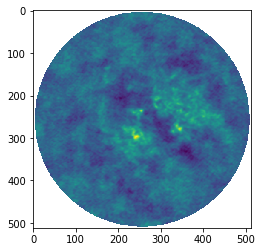

In [47]:
cube = cube_87_spw25
freq_lo, freq_hi = 86.3*u.GHz, 86.36*u.GHz # Frequency limits for search

tbl = Splatalogue.query_lines(freq_lo-0.1*u.GHz, freq_hi+0.1*u.GHz, 
                              chemical_name=' H13CN ',
                              energy_max=500, # more lines w/ max energy > 140
                              energy_type='eu_k',
                              line_lists=['JPL'],
                              show_upper_degeneracy=True, 
                              show_qn_code=True)
tbl.show_in_notebook()
line_freqs = tbl['Meas Freq-GHz(rest frame,redshifted)'].data
shifted_line_freqs = line_freqs-((9.5/299792)*line_freqs) # Shift by velocity

center_freq = shifted_line_freqs[-1]*u.GHz; print(center_freq)
slab_width = 5.*u.km/u.s
subcube = cube.spectral_slab(center_freq - 0.1*u.GHz, center_freq + 0.1*u.GHz).to(u.K)
subcube_v = subcube.with_spectral_unit(u.km/u.s, 
                                       rest_value = center_freq,
                                       velocity_convention = 'radio').spectral_slab(-slab_width, 
                                                                                         slab_width)
print(subcube_v)
moment_0 = subcube_v.moment(order = 0)
moment_0.quicklook()

### H13CO+

86.73504452365039 GHz
DaskVaryingResolutionSpectralCube with shape=(4, 512, 512) and unit=K and chunk size (4, 256, 256):
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
 n_s:      4  type_s: VRAD      unit_s: km / s  range:       -6.638 km / s:       3.487 km / s


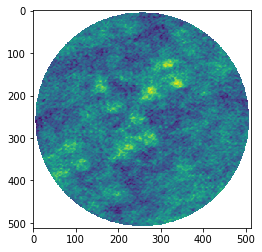

In [59]:
cube = cube_87_spw25
freq_lo, freq_hi = 86.7*u.GHz, 86.78*u.GHz # Frequency limits for search

tbl = Splatalogue.query_lines(freq_lo-0.1*u.GHz, freq_hi+0.1*u.GHz, 
                              chemical_name='H13CO+',
                              energy_max=500, # more lines w/ max energy > 140
                              energy_type='eu_k',
                              line_lists=['JPL'],
                              show_upper_degeneracy=True, 
                              show_qn_code=True)
tbl.show_in_notebook()
line_freqs = tbl['Meas Freq-GHz(rest frame,redshifted)'].data
shifted_line_freqs = line_freqs-((66.5/299792)*line_freqs) # Shift by velocity

center_freq = shifted_line_freqs[-1]*u.GHz; print(center_freq)
slab_width = 5.*u.km/u.s
subcube = cube.spectral_slab(center_freq - 0.1*u.GHz, center_freq + 0.1*u.GHz).to(u.K)
subcube_v = subcube.with_spectral_unit(u.km/u.s, 
                                       rest_value = center_freq,
                                       velocity_convention = 'radio').spectral_slab(-slab_width, 
                                                                                         slab_width)
print(subcube_v)
moment_0 = subcube_v.moment(order = 0)
moment_0.quicklook()

### HN13C

87.08736394900464 GHz
DaskVaryingResolutionSpectralCube with shape=(4, 512, 512) and unit=K and chunk size (4, 256, 256):
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
 n_s:      4  type_s: VRAD      unit_s: km / s  range:       -3.842 km / s:       6.241 km / s


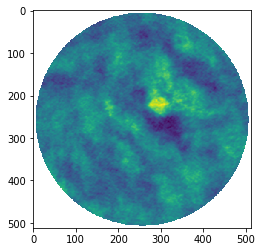

In [42]:
cube = cube_87_spw25
freq_lo, freq_hi = 87.06*u.GHz, 87.11*u.GHz # Frequency limits of moment 0 map

tbl = Splatalogue.query_lines(freq_lo-0.1*u.GHz, freq_hi+0.1*u.GHz, 
                              chemical_name='HN13C',
                              energy_max=500, # more lines w/ max energy > 140
                              energy_type='eu_k',
                              line_lists=['JPL'],
                              show_upper_degeneracy=True, 
                              show_qn_code=True)
tbl.show_in_notebook()
line_freqs = tbl['Meas Freq-GHz(rest frame,redshifted)'].data
shifted_line_freqs = line_freqs-((12./299792)*line_freqs) # Shift by velocity

center_freq = shifted_line_freqs[-1]*u.GHz; print(center_freq)
slab_width = 5.*u.km/u.s
subcube = cube.spectral_slab(center_freq - 0.1*u.GHz, center_freq + 0.1*u.GHz).to(u.K)
subcube_v = subcube.with_spectral_unit(u.km/u.s, 
                                       rest_value = center_freq,
                                       velocity_convention = 'radio').spectral_slab(-slab_width, 
                                                                                         slab_width)
print(subcube_v)
moment_0 = subcube_v.moment(order = 0)
moment_0.quicklook()

### CCH v=0

In [65]:
cube = cube_87_spw25
freq_lo, freq_hi = 87.25*u.GHz, 87.35*u.GHz # Frequency limits of moment 0 map

tbl = Splatalogue.query_lines(freq_lo-0.1*u.GHz, freq_hi+0.1*u.GHz, 
                              chemical_name=' CCH',
                              energy_max=500, # more lines w/ max energy > 140
                              energy_type='eu_k',
                              line_lists=['JPL'],
                              show_upper_degeneracy=True, 
                              show_qn_code=True)
tbl.show_in_notebook()
# line_freqs = tbl['Meas Freq-GHz(rest frame,redshifted)'].data
# shifted_line_freqs = line_freqs-((12./299792)*line_freqs) # Shift by velocity

# center_freq = shifted_line_freqs[1]*u.GHz; print(center_freq)
# slab_width = 5.*u.km/u.s
# subcube = cube.spectral_slab(center_freq - 0.1*u.GHz, center_freq + 0.1*u.GHz).to(u.K)
# subcube_v = subcube.with_spectral_unit(u.km/u.s, 
#                                        rest_value = center_freq,
#                                        velocity_convention = 'radio').spectral_slab(-slab_width, 
#                                                                                          slab_width)
# print(subcube_v)
# moment_0 = subcube_v.moment(order = 0)
# moment_0.quicklook()

idx,Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Upper State Degeneracy,Quantum Number Code,Linelist
0,CCHv=0,Ethynyl,--,--,87.284156,3e-06,"N=1-0,J=3/2-1/2,F=1-1",-5.0204,0.14525,0.246,-6.42627,0.53,0.0015,0.00216,2.91299,4.19111,3.0,123,JPL
1,CCHv=0,Ethynyl,--,--,87.316925,4e-06,"N=1-0,J=3/2-1/2,F=2-1",-4.0285,1.42458,2.409,-5.65605,4.0,0.0015,0.00216,2.91408,4.19269,5.0,123,JPL
2,CCHv=0,Ethynyl,--,--,87.328624,6e-06,"N=1-0,J=3/2-1/2,F=1-0",-4.3311,0.70952,1.2,-5.73675,2.27,0.0,0.0,2.91297,4.19109,3.0,123,JPL
3,CCHv=0,Ethynyl,--,--,87.402004,5e-06,"N=1-0,J=1/2-1/2,F=1-1",-4.3304,0.70949,1.2,-5.73568,2.25,0.0015,0.00216,2.91692,4.19677,3.0,123,JPL
4,CCHv=0,Ethynyl,--,--,87.407165,1.1e-05,"N=1-0,J=1/2-1/2,F=0-1",-4.7266,0.2849,0.482,-5.65473,1.02,0.0015,0.00216,2.91709,4.19702,1.0,123,JPL
5,CCHv=0,Ethynyl,--,--,87.446512,2.3e-05,"N=1-0,J=1/2-1/2,F=1-0",-5.0188,0.14524,0.246,-6.42386,0.56,0.0,0.0,2.9169,4.19675,3.0,123,JPL


### CH3CCH

102.5303487 GHz
DaskVaryingResolutionSpectralCube with shape=(12, 512, 512) and unit=K and chunk size (12, 256, 256):
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
 n_s:     12  type_s: VRAD      unit_s: km / s  range:      -15.453 km / s:      15.953 km / s


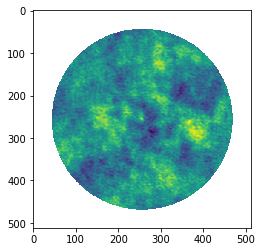

In [75]:
cube = cube_102_spw106
freq_lo, freq_hi = 102.5*u.GHz, 102.56*u.GHz # Frequency limits of moment 0 map

tbl = Splatalogue.query_lines(freq_lo-0.1*u.GHz, freq_hi+0.1*u.GHz, 
                              chemical_name='CH3CCH',
                              energy_max=500, # more lines w/ max energy > 140
                              energy_type='eu_k',
                              line_lists=['JPL'],
                              show_upper_degeneracy=True, 
                              show_qn_code=True)
tbl.show_in_notebook()
line_freqs = tbl['Meas Freq-GHz(rest frame,redshifted)'].data
shifted_line_freqs = line_freqs-((0./299792)*line_freqs) # Shift by velocity

center_freq = shifted_line_freqs[2]*u.GHz; print(center_freq)
slab_width = 15.*u.km/u.s
subcube = cube.spectral_slab(center_freq - 0.1*u.GHz, center_freq + 0.1*u.GHz).to(u.K)
subcube_v = subcube.with_spectral_unit(u.km/u.s, 
                                       rest_value = center_freq,
                                       velocity_convention = 'radio').spectral_slab(-slab_width, 
                                                                                         slab_width)
print(subcube_v)
moment_0 = subcube_v.moment(order = 0)
moment_0.quicklook()

### H2CS

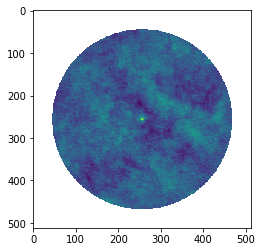

In [35]:
cube = cube_102_spw106
freq_lo, freq_hi = 103*u.GHz, 103.07*u.GHz # Frequency limits of moment 0 map

subcube = cube.spectral_slab(freq_lo, freq_hi).to(u.K) # Slice out subcube, convert to K
subcube_v = subcube.with_spectral_unit(u.km/u.s, 
                                       rest_value = 103.035*u.GHz,
                                       velocity_convention = 'radio')
moment_0 = subcube_v.moment(order = 0)
moment_0.quicklook()

### SiO v=1 (maser)

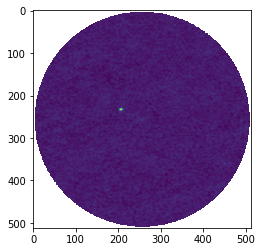

In [38]:
cube = cube_87_spw25
freq = 86.233127*u.GHz # Center frequency
slab_width = 2*u.km/u.s

subcube = cube.with_spectral_unit(u.km/u.s, 
                                  rest_value = freq,
                                  velocity_convention = 'radio')
subcube_v = subcube.spectral_slab(-0.5*slab_width, 0.5*slab_width).to(u.K)
moment_0 = subcube_v.moment(order = 0)
moment_0.quicklook()

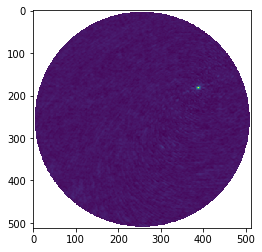

In [39]:
cube = cube_87_spw25
freq = 86.238985*u.GHz # Center frequency
slab_width = 2*u.km/u.s

subcube = cube.with_spectral_unit(u.km/u.s, 
                                  rest_value = freq,
                                  velocity_convention = 'radio')
subcube_v = subcube.spectral_slab(-0.5*slab_width, 0.5*slab_width).to(u.K)
moment_0 = subcube_v.moment(order = 0)
moment_0.quicklook()

### CH3OH Class I (maser)

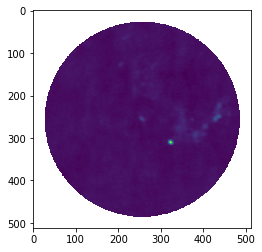

In [47]:
cube = cube_95_spw25
freq = 95.156*u.GHz # Center frequency
slab_width = 2*u.km/u.s

subcube = cube.with_spectral_unit(u.km/u.s, 
                                  rest_value = freq,
                                  velocity_convention = 'radio')
subcube_v = subcube.spectral_slab(-0.5*slab_width, 0.5*slab_width).to(u.K)
moment_0 = subcube_v.moment(order = 0)
moment_0.quicklook()